In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os 
os.chdir('/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


In [2]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:


#Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
#Libraries for ML
from sklearn.preprocessing import StandardScaler #Standardizasyon için
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV: KNN ile ilgili en iyi parametreleri belirlemek
from sklearn.metrics import accuracy_score ,confusion_matrix #Sonuç değerlendirme
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor #Trainin algoritması ve NCA ve Outlier değerler için
from sklearn.decomposition import PCA #PCA için

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns


<a id ="1"></a><br>
# Read and Examination Dataset

In [4]:
#read data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Split Data as M&B
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]

<a id ="2"></a><br>
### Basic Visualization

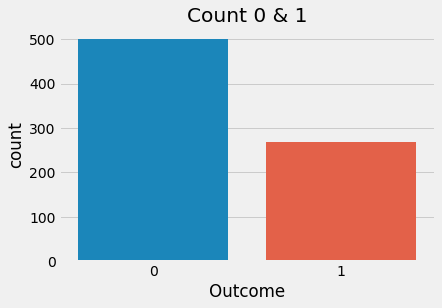

In [6]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

<a id ="3"></a><br>
# Exploratory Data Analysis

In [7]:
print('Data Shape',data.shape)
print(data.info()) 
describe = data.describe()
describe.T

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


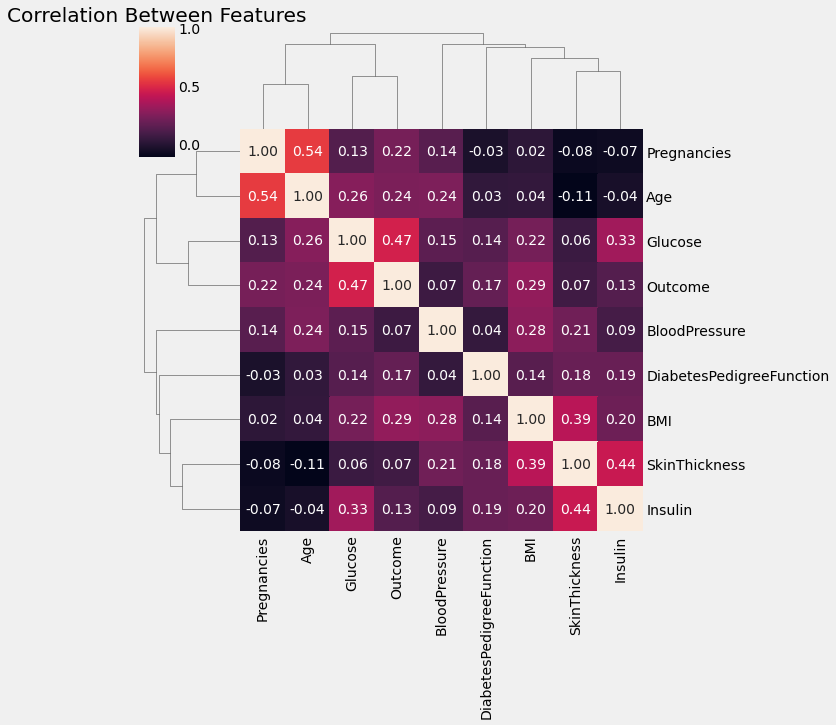

In [8]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

<a id ="4"></a><br>
## Feautre Visualization with Box plot [Before Standardization]

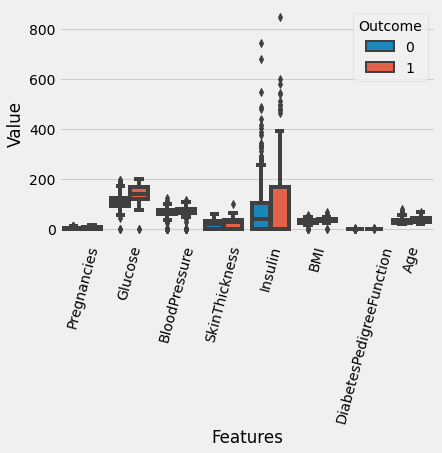

In [9]:
#Box p. öncesi bir melted işlemi gerekitor.
data_melted = pd.melt(data,id_vars='Outcome',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='Outcome',data=data_melted) #Featureslar target'a göre ayrıldı.
plt.xticks(rotation=75) #Feature isimleri 90 derece dik görülecek.
plt.show()


<a id ="5"></a><br>
## Analysis of Diabetic Cases

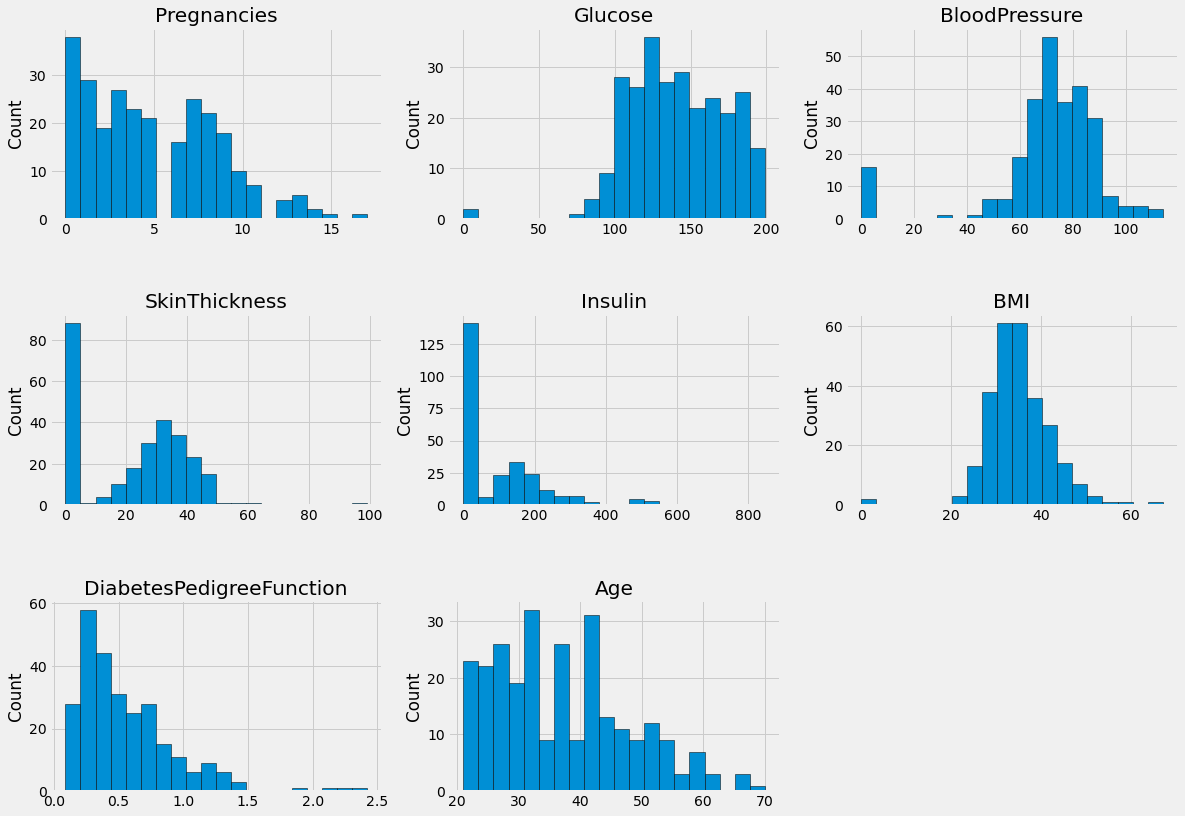

In [10]:
#General Analysis

data1 = data[data["Outcome"]==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

<a id ="6"></a><br>
## Analysis of Non-Diabetic Cases

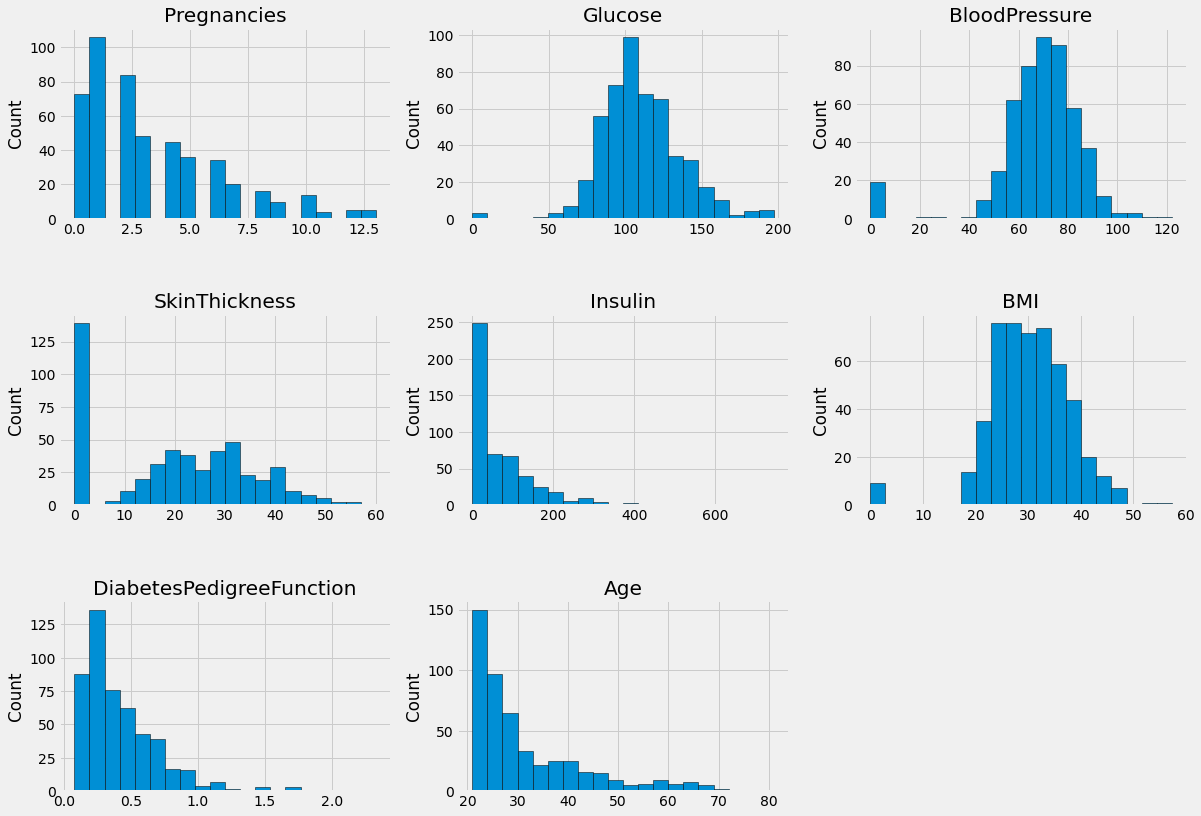

In [11]:
#General Analysis

data1 = data[data["Outcome"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

<a id ="7"></a><br>
## Visualization of Features

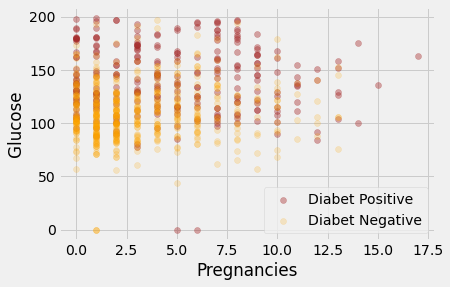

In [12]:


plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

#We appear that it is clear segregation.

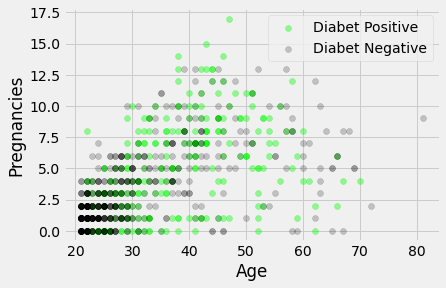

In [13]:
#Visualization, Scatter Plot

plt.scatter(p.Age,p.Pregnancies,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Age,n.Pregnancies,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()

#We appear that it is clear segregation.

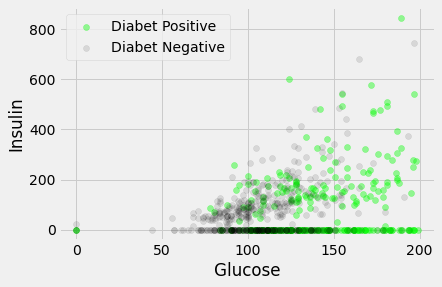

In [14]:
#Visualization, Scatter Plot

plt.scatter(p.Glucose,p.Insulin,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Glucose,n.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

#We appear that it is clear segregation.

<a id ="8"></a><br>
## Outlier Detection

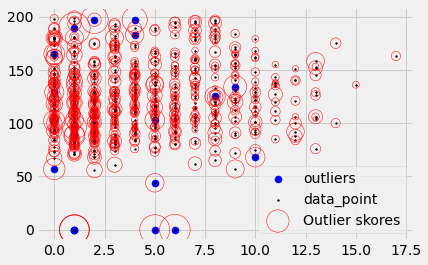

In [15]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
columns = x.columns.tolist() # Featureların isimlerini bir listede topladık.

clf = LocalOutlierFactor() #KNN değeri gerekiyor. Tanımlı değeri 20 ve bizde 20 kullanacağız. O nedenle birşey yazmayacağız.
y_pred = clf.fit_predict(x) #LOF uygulayıo negetif outlier f. alıyoruz.

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist() #outlier değerlerine threshold uygulanmış olanları bir listeye attık

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point') #s : boyut

radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() ) #Değerleri normalize ederek biası önledik
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

### Drop Outliers

In [16]:
x = x.drop(outlier_index) #outliers remove
y = y.drop(outlier_index).values #outliers remove

In [17]:
# c = x
# c.shape

In [18]:
# c['Outcome'] = y
# c.shape

In [19]:
# c.Outcome.value_counts()

In [20]:
# !pip install imblearn

In [21]:
# x = c.drop('Outcome', axis=1)
# y = c['Outcome']

# from imblearn.over_sampling import SMOTE

# sm = SMOTE()

# x_train_aug, y_train_aug = sm.fit_resample(x,y)

In [22]:
# from collections import Counter
# print('Before SMOTE: ',Counter(y))
# print('After SMOTE: ',Counter(y_train_aug))

In [23]:
# x = x_train_aug

# y = y_train_aug

<a id ="9"></a><br>
# Train Tespt Split & Standardization Processing

In [24]:
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scaler isimli bir değişkene Standartscaler metodunu atayıp sonra bu değişken aracılığıyla xtraindeki verileri standardize ettik

x_test = scaler.transform(x_test)

x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train

<a id ="10"></a><br>
## Box Plot Visualization after the Standardization

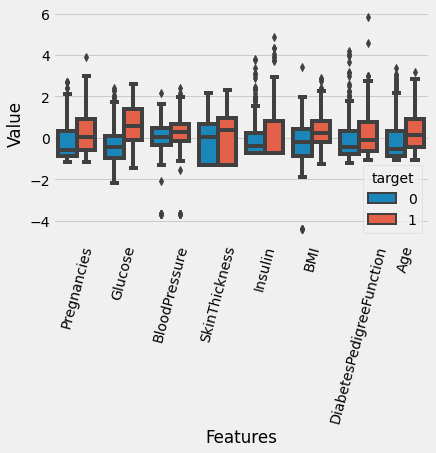

In [26]:
data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) #Featureslar target'a göre ayrıldı.
plt.xticks(rotation=75) #Feature isimleri 90 derece dik görülecek.
plt.show()

<a id ="11"></a><br>
# Machine Learning Models

<a id ="12"></a><br>
## Logistic Regression (LR)

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [28]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = LR, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7502542372881356
Standart Deviation Accuracies:  0.04536417977366145


In [29]:
LR.fit(x_train,y_train)
print("Test Accuracy {}".format(LR.score(x_test,y_test))) 

LRscore = LR.score(x_test,y_test)

Test Accuracy 0.86


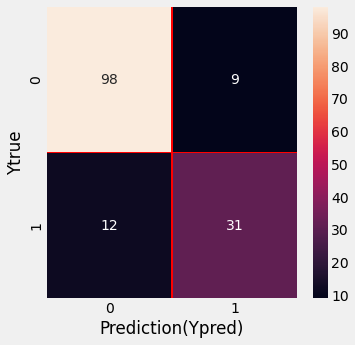

In [30]:
#Confusion Matrix

yprediciton1= LR.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="14"></a><br>
## Support Vector Machine (SVM)

In [31]:
#SVM with Sklearn

from sklearn.svm import SVC

SVM = SVC(random_state=42)

In [32]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= x_train, y=y_train, cv=5)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7387394957983193
Standart Deviation Accuracies:  0.060221832411610915


In [33]:
SVM.fit(x_train,y_train)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(x_test,y_test))

SVMscore = SVM.score(x_test,y_test)

SVM Accuracy: 0.84


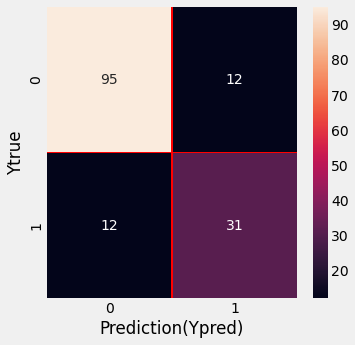

In [34]:
#Confusion Matrix

yprediciton3= SVM.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton3)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="17"></a><br>
# Random Forest

In [35]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(x_test,y_test))


Decision Tree Score:  0.7333333333333333


In [36]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 82, random_state=42) #n_estimator = DT

In [37]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7468926553672316
Standart Deviation Accuracies:  0.058511137891561996


In [38]:
RFC.fit(x_train,y_train) # learning
print("Random Forest Score: ",RFC.score(x_test,y_test))
RFCscore=RFC.score(x_test,y_test)

Random Forest Score:  0.8733333333333333


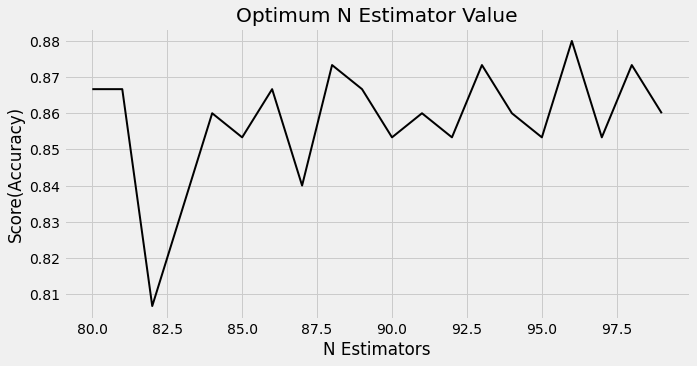

In [39]:
#Find Optimum K value
scores = []
for each in range(80,100):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(x_train,y_train)
    scores.append(RFfind.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(80,100),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

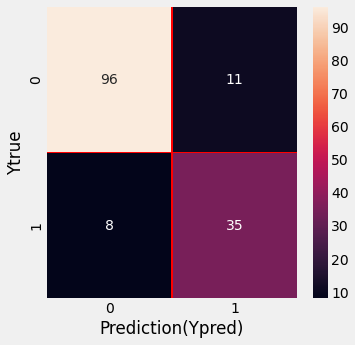

In [40]:
#Confusion Matrix

yprediciton6= RFC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton6)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [41]:

import pickle
# Dump the trained Naive Bayes classifier with Pickle
KC_pkl_filename = 'RandomForest887.pkl'

# Open the file to save as pkl file
KC_Model_pkl = open(KC_pkl_filename, 'wb')
pickle.dump(RFC, KC_Model_pkl)

# Close the pickle instances
KC_Model_pkl.close()